# Molecular Maps: TSNE CLustering for POST Trimming

Author: AlvaroVM [https://alvarovm.github.io](http://alvarovm.github.io)
Version: 0.0.1

## Example 1: PCA to distinguish between rings and chains

For this example we define in SMILES string two groups of molecules with different substituents, such as -CH3, -O, -F, -Cl, and- I , in molecules with six carbons 1) in a ring and 2) in chain. Those molecules would be added to a list, additionally we add a 'certain' property , this could be used later as a flag.

In [1]:
import sys
import os
SRC_DIR='..'

In [2]:
sys.path.append(os.path.join(SRC_DIR, 'code'))
import utils

/home/vama/soft/python-tests/introtohpc/notebooks/../code/utils.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
#https://github.com/jmcarpenter2/swifter
#import swifter
#2-TSNE-UMAP-map-cuda-Copy1

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs 
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import  GetHashedMorganFingerprint
from rdkit.DataStructs import ConvertToNumpyArray

from sklearn.manifold import TSNE

import hdbscan

utils.plot_settings2()

results_path = os.path.join(SRC_DIR,'results')

In [4]:
df = pd.read_pickle('../data/extended_db_Zindo_Nov_2019_V5_cannfp_clust.pkl').fillna(value = 0)
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))
#df.head(2)

Column names: ['smiles', 'inchikey', 'fpfailp', 'fpfail', 'smi_pre', 'lambda_sTDA (nm)', 'f1_sTDA', 'lumo_dft', 'homo_dft', 'dmom_dft (D)', 'lambda_z (nm)', 'f1_z', 'lumo_z', 'homo_z', 'dmom_z (D)', 'lumo_mopac', 'homo_mopac', 'dmom_mopac (D)', 'lambda_tddft (nm)', 'f1_tddft', 'lambda_exp_max (nm)', 'epsilon_exp_max ', 'lambda_exp_min (nm)', 'epsilon_exp_min ', 'solvent', 'nogood', 'nogoodp', 'mol', 'molp', 'morganfps-b', 'morganfps-b8', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'MolWt', 'MolWtp', 'gapdft', 'gapmopac', 'gapz', 'cluster', 'clusterprob']
Table Shape: (6485, 55)


In [5]:
import seaborn as sns

In [6]:
df =df.sample(n=1000)
df.shape

(1000, 55)

/tmp/ipykernel_44090/1815705970.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[tag].tolist())


<Axes: ylabel='Density'>

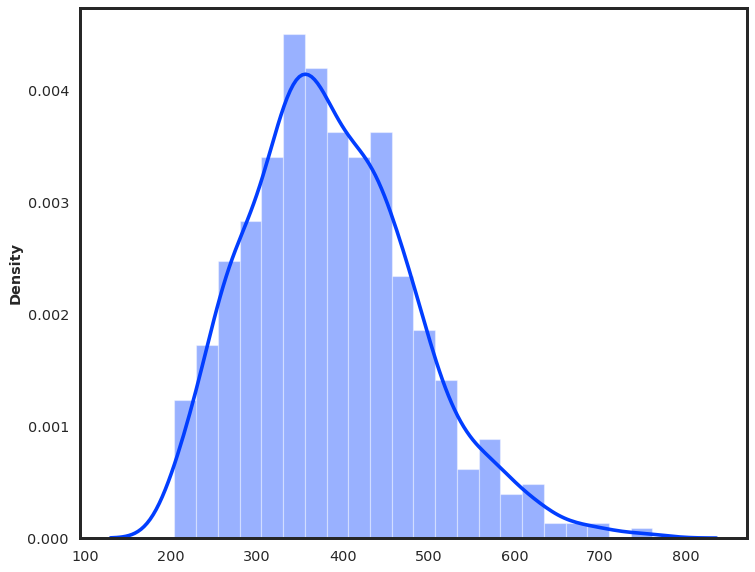

In [7]:
tag='lambda_exp_max (nm)'
df=df[df[tag]>200]
df=df[df[tag]<800]
sns.distplot(df[tag].tolist())

In [8]:
#df = df[df['lambda_sTDA (nm)']>0]

We load *rdkit*  and *numpy* 

In [9]:
X=df['morganfps-b'].values.tolist()
len(X)
Xmat=np.array(X)
Xmat.shape

(894, 2048)

894


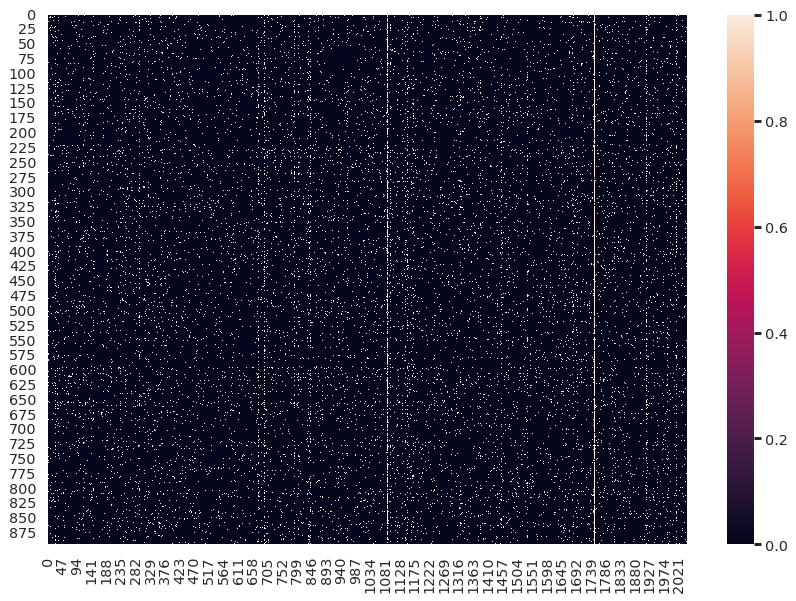

In [10]:
X=df['morganfps-b'].values.tolist()
print(len(X))
Xmat=np.array(X)
plt.figure(figsize=(12,8))
ax = sns.heatmap(Xmat)
plt.show()

894


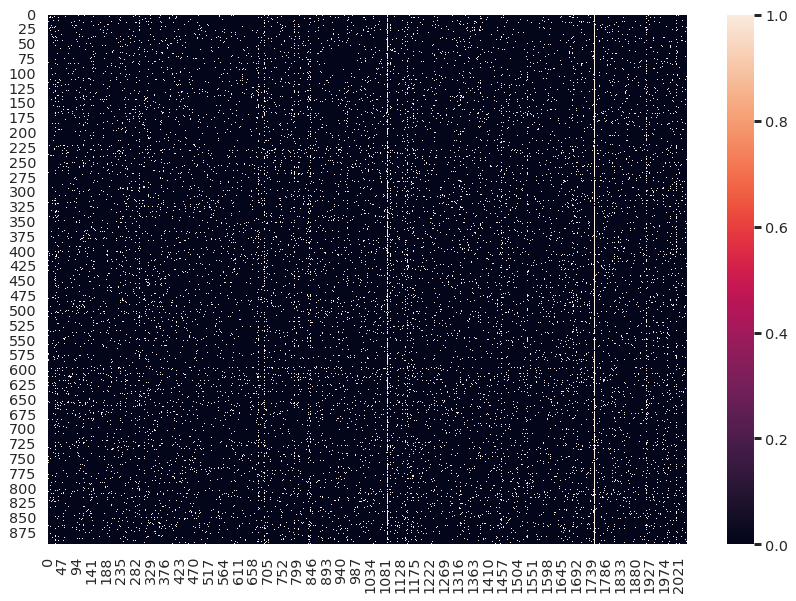

In [11]:
X=df['morganfps-b8'].values.tolist()
print(len(X))
Xmat=np.array(X)
plt.figure(figsize=(12,8))
ax = sns.heatmap(Xmat)
plt.show()

In [12]:
Xsum=np.sum(Xmat, axis=0)

In [13]:
Xsum=[1,2,3,4,3,2,1]

In [14]:
[i for i in range(7)]

[0, 1, 2, 3, 4, 5, 6]

In [15]:
a=[1,2]
b=['a', 'b']

In [16]:
for e, f in zip(a,b):
    print(f)

a
b


In [17]:
np.sort(Xsum[0:100])[-10:]

array([1, 1, 2, 2, 3, 3, 4])

In [18]:
sns.barplot(x=[i for i in range(20)],y=np.sort(Xsum[:])[-20:])

KeyError: 0

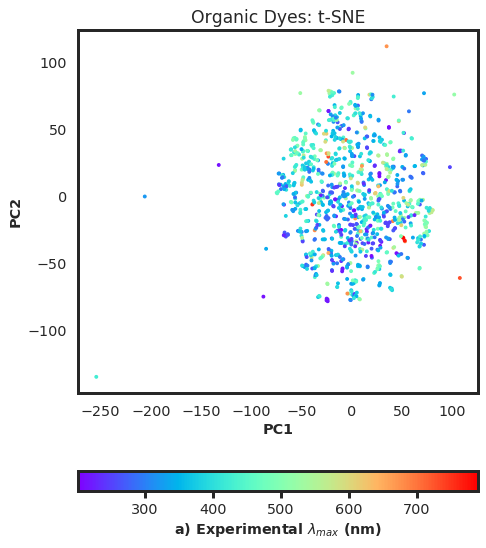

In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#tsne = TSNE(n_components=2, metric=tanimoto_dist,perplexity=50)

#tsne = TSNE(n_components=2, metric='jaccard',perplexity=50, init='pca',n_iter=1000)
#tsne = TSNE(n_components=2, metric='jaccard',perplexity=50, n_iter=250)
tsne = TSNE(n_components=2, metric='jaccard',perplexity=15, n_iter=3000, init='pca', random_state=23)

tsne_X = tsne.fit_transform(X)

plt.figure(figsize=(6,8))
plt.scatter(tsne_X.T[0], tsne_X.T[1], marker='o',c=df[tag].values[:],s=5, cmap='rainbow')

#plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], 
#             color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(r'a) Experimental $\lambda_{max}$ (nm)')
#cbar.ax.set_ylabel('Cluster Id',rotation=270,labelpad=25)
#utils.save_figure(results_path,'tsne-dyes_lem')
plt.show()

In [19]:
from from sklearn.manifold import TSNE

In [21]:
from cuml.manifold import TSNE as cutsne

In [33]:
#cumltsne = cutsne(n_components=2, metric='jaccard',perplexity=50, n_iter=2000, init='pca', random_state=0)
cumltsne = cutsne(n_components=2,perplexity=50, n_iter=2000,  random_state=0)


In [34]:
cumltsne_X = cumltsne.fit_transform(Xmat)

RuntimeError: parallel_for failed: no kernel image is available for execution on the device

In [35]:
Xmat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

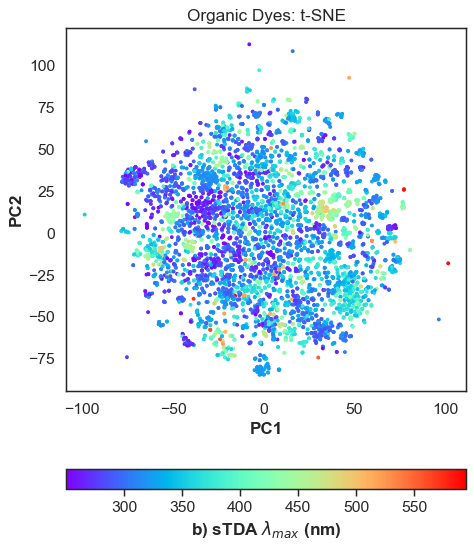

In [37]:
plt.figure(figsize=(6,8))
tag='lambda_sTDA (nm)'
plt.scatter(tsne_X.T[0], tsne_X.T[1], marker='o',c=df[tag].values[:],s=5, cmap='rainbow')

#plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], 
#             color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(r'b) sTDA $\lambda_{max}$ (nm)')
#cbar.ax.set_ylabel('Cluster Id',rotation=270,labelpad=25)
utils.save_figure(results_path,'tsne-dyes__lem_sta')
plt.show()

### Cluster analysis

In [33]:
cluster_tsne = hdbscan.HDBSCAN(min_cluster_size=15
                               , gen_min_span_tree=True)

In [34]:
cluster_tsne.fit(tsne_X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=15, min_samples=None, p=None,
        prediction_data=False)

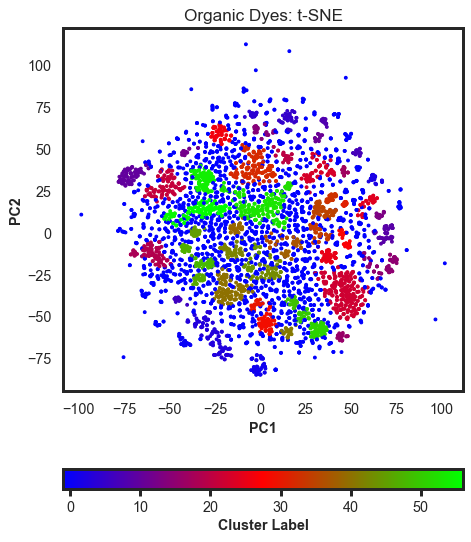

In [35]:
plt.figure(figsize=(6,8))
plt.scatter(tsne_X.T[0], tsne_X.T[1], marker='o',c=cluster_tsne.labels_,s=5, cmap='brg')
#plt.scatter(tsne_X.T[0], df[ 'lambda_sTDA (nm)'][x_index].values[:]  , marker='o',c=cluster_tsne.labels_,s=50, cmap='hsv')
        

#plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], 
#             color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Cluster Label')
plt.show()

In [36]:
import seaborn as sns
sns.set_context("paper")
#sns.set_style('white')
sns.set(style='white', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
pal = sns.color_palette('bright', len(cluster_tsne.labels_))
#pal=sns.color_palette()

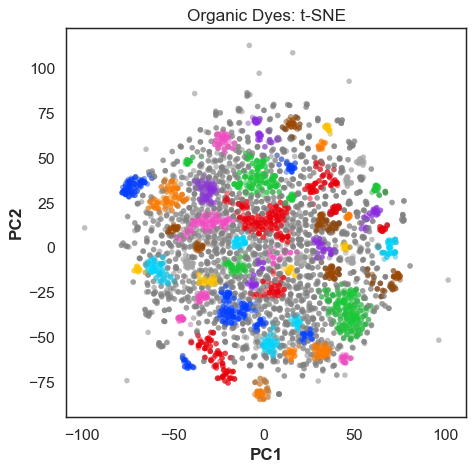

In [47]:
plt.figure(figsize=(6,6))
plot_kwds={'alpha':.5, 's':20, 'linewidths':.1}
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(cluster_tsne.labels_,
                                                            cluster_tsne.probabilities_)]
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')
plt.scatter(tsne_X.T[0], tsne_X.T[1], c=colors, **plot_kwds)
#cbar = plt.colorbar(orientation='horizontal')
#cbar.set_label('Cluster probability')
#utils.save_figure(results_path,'tsne-color-cluster_lem')
plt.show()

### Add cluster to Dataframe

In [38]:
df['cluster']=cluster_tsne.labels_
df['clusterprob']=cluster_tsne.probabilities_

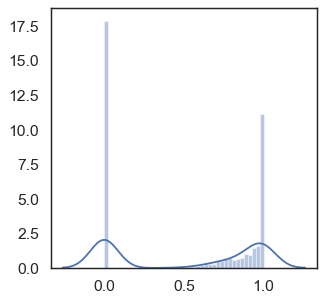

In [39]:
#np.sort(df.cluster.unique())
plt.figure(figsize=(4,4))
sns.distplot(cluster_tsne.probabilities_,bins=40)
plt.show()

In [17]:
#conc = np.vstack(cluster_tsne.labels_)
#cluster_tsne.labels_.flatten()
#df['cluster']=pd.DataFrame(conc)
#df[df['cluster']== 2]

In [40]:
print('Total number of clusters found = {}'.format(df.cluster.unique().shape[0]))

Total number of clusters found = 58


57


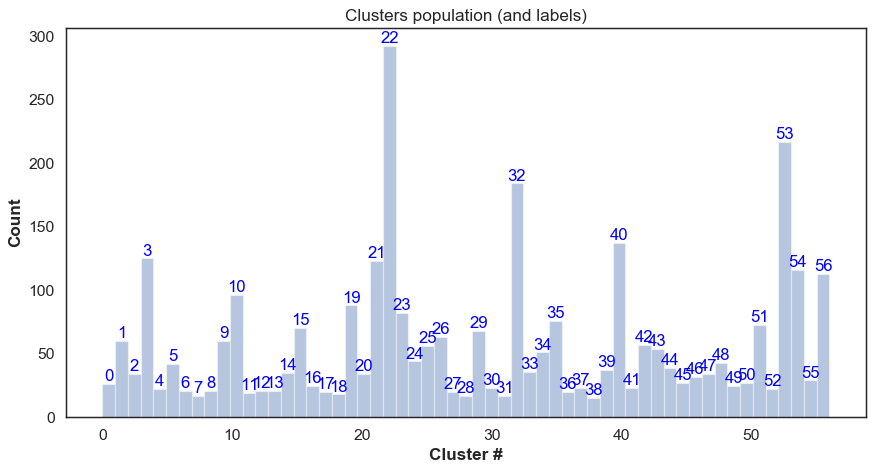

In [41]:
#df[df.cluster > 0].cluster
plt.figure(figsize=(12,6))
ax=sns.distplot(df[df.cluster > -1].cluster,bins=df.cluster.unique().shape[0]-1,kde=False)
#ax=sns.distplot(df.cluster,bins=df.cluster.unique().shape[0]-1,kde=False)

s = 0

for p in ax.patches:
    s+= p.get_height()
    
for key, p in enumerate(ax.patches): 
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            '{}'.format(key), 
            fontsize=14,
            color='blue',
            ha='center',
            va='bottom')

print(len(ax.patches))
plt.xlabel(r'Cluster #')
plt.ylabel('Count')
plt.title('Clusters population (and labels)')
#utils.save_figure(results_path,'cluster-population_lem')
plt.show()

57


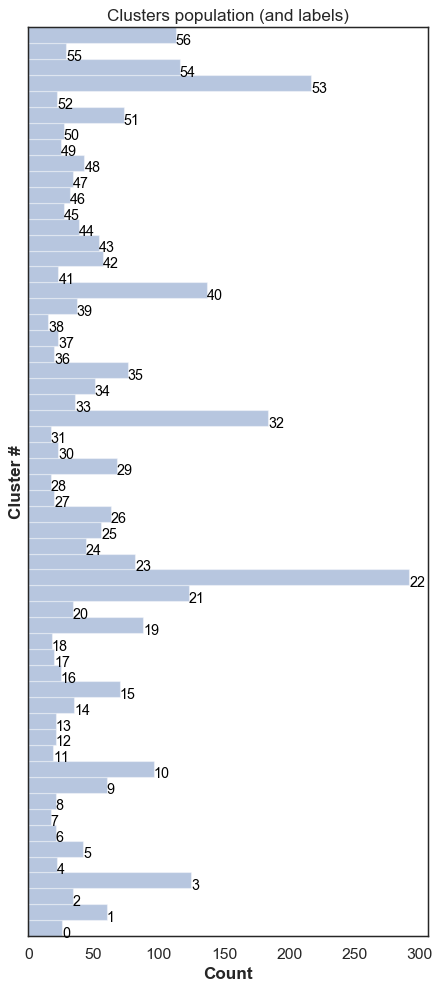

In [42]:
#df[df.cluster > 0].cluster
plt.figure(figsize=(6,14))
ax=sns.distplot(df[df.cluster > -1].cluster,bins=df.cluster.unique().shape[0]-1,kde=False, vertical=True)
#ax=sns.distplot(df.cluster,bins=df.cluster.unique().shape[0]-1,kde=False)

ax.set_ylim([0,56])




s = 0

for p in ax.patches:
    s+= p.get_height()

for key, p in enumerate(ax.patches): 
    ax.text(p.get_width(),
        p.get_y() - p.get_height()/4., 
            '{}'.format(key), 
            fontsize=12,
            color='black',
            ha='left',
            va='bottom')
    
print(len(ax.patches))

plt.yticks([], [])
plt.xlabel(r'Count')
plt.ylabel('Cluster #')
plt.title('Clusters population (and labels)')
#utils.save_figure(results_path,'cluster-population-ver_lem')
plt.show()

### Size of each cluster

In [43]:
counts = df.cluster.value_counts()
counts

-1     2581
 22     292
 53     217
 32     184
 40     137
 3      125
 21     123
 54     116
 56     113
 10      96
 19      88
 23      82
 35      76
 51      73
 15      70
 29      68
 26      63
 1       60
 9       60
 42      57
 25      56
 43      54
 34      51
 24      44
 48      43
 5       42
 44      39
 39      37
 33      36
 14      35
 2       34
 47      34
 20      34
 46      32
 55      29
 50      27
 45      27
 0       26
 49      25
 16      25
 37      23
 30      23
 41      23
 4       22
 52      22
 6       21
 8       21
 12      21
 13      21
 27      20
 17      20
 36      20
 11      19
 18      18
 28      17
 31      17
 7       17
 38      15
Name: cluster, dtype: int64

### Plot the first 8 clusters more populated

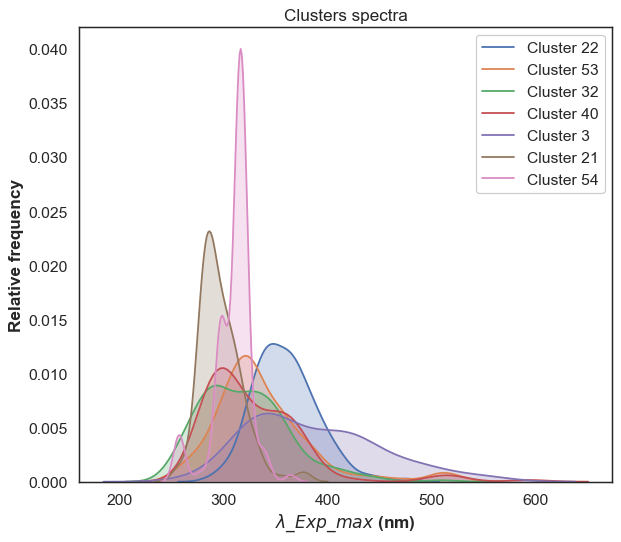

In [44]:
## Draw.MolsToGridImage(df[df['cluster']==1]]
import matplotlib as mpl
fig, ax = plt.subplots(1, 1, figsize=(8,7))
ax=[]
names=[]
for e in counts[1:8].keys():
    label='Cluster {}'.format(e)
    ax=sns.distplot(df[df['cluster']==e]['lambda_sTDA (nm)'].values, hist=False,kde_kws={"shade": True},label=label)
    #names.append('Cluster {}'.format(e))

plt.xlabel(r'$\lambda\_Exp\_max$ (nm)')
plt.ylabel('Relative frequency')
plt.title('Clusters spectra')

#utils.save_figure(results_path,'cluster-spectra_lem')
#ax.legend(names)
#header_legend('',  title='Clusters', loc='upper right',bbox_to_anchor=(1.15,1.0))
plt.show()

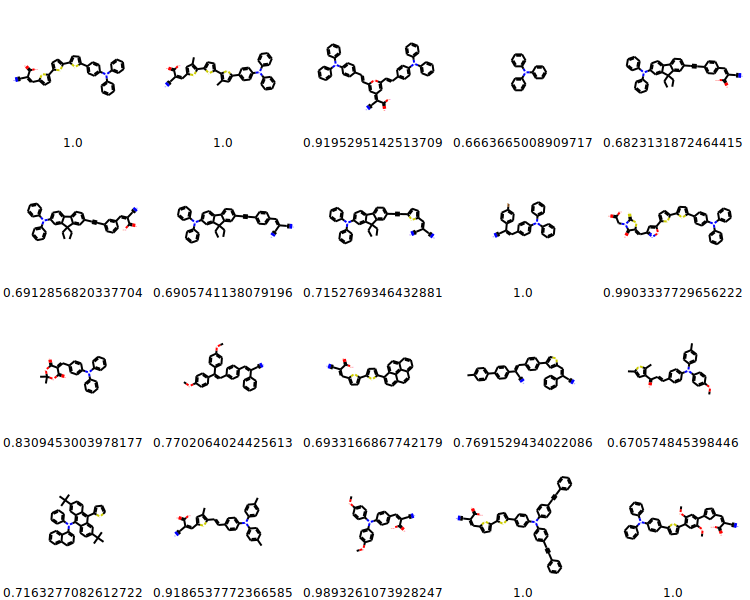

In [45]:
tag=22
mollist=df[df['cluster']==tag].mol[0:20].tolist()

stalist=df[df['cluster']==tag]['clusterprob'][0:20].tolist()
#stalist=df[df['cluster']==tag]['lambda_sTDA (nm)'][0:20].tolist()
lengend=[r'{} '.format(x) for x in stalist]
#Draw.MolsToGridImage(mollist,lengends=[r'{}'.format(x) for x in stalist])
svg = Draw.MolsToGridImage(mollist, molsPerRow=5, subImgSize=(150,150), legends=lengend ,useSVG=True)

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'sample-cluster23')
utils.display_svg(svg)

In [23]:
kwargs={'alpha':.25, 's':50, 'linewidths':.1}
smart='c1ccc(cc1)-[#7](-c1ccccc1)-c1ccccc1'

tag=22
mollist=df[df['cluster']==tag].mol[0:6].tolist()
stalist=df[df['cluster']==tag]['lambda_sTDA (nm)'][0:6].tolist()
lengend=[r'{} nm'.format(x) for x in stalist]
#Draw.MolsToGridImage(mollist,lengends=[r'{}'.format(x) for x in stalist])
#https://rdkit.blogspot.com/2015/02/new-drawing-code.html
svg = Draw.MolsToGridImage(mollist, molsPerRow=3, subImgSize=(350,350),
                           highlightAtomLists=[mol.GetSubstructMatch(Chem.MolFromSmarts(smart)) for mol in mollist],
                           legends=lengend ,useSVG=True, **kwargs)

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'sample-cluster23-highligh')
utils.display_svg(svg)


ArgumentError: Python argument types in
    MolDraw2D.DrawMolecules(MolDraw2DSVG, list)
did not match C++ signature:
    DrawMolecules(RDKit::MolDraw2D {lvalue} self, boost::python::api::object mols, boost::python::api::object highlightAtoms=None, boost::python::api::object highlightBonds=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, boost::python::api::object confIds=None, boost::python::api::object legends=None)

In [95]:
?Draw.MolsToGridImage

Signature:
Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(200, 200),
    legends=None,
    highlightAtomLists=None,
    highlightBondLists=None,
    useSVG=False,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/install/local/anaconda3/envs/jacquimaps36/lib/python3.6/site-packages/rdkit/Chem/Draw/__init__.py
Type:      function


In [55]:
#lamdas=np.array([df[ 'lambda_sTDA (nm)'][x_index].values[e] if v>0. else 0 for e, v in enumerate(cluster_tsne.probabilities_)])
lamdas=np.array([df[ 'lambda_sTDA (nm)'].values[e] if v>0.8 else 200. for e, v in enumerate(cluster_tsne.probabilities_)])

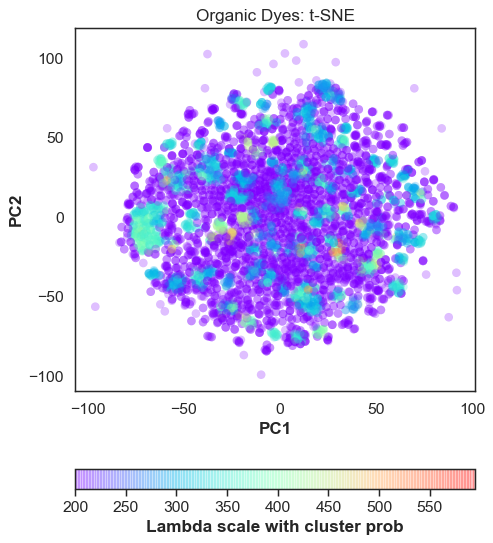

In [56]:
plt.figure(figsize=(6,8))
plot_kwds={'alpha':.25, 's':50, 'linewidths':.1}

#plt.scatter(tsne_X.T[0], tsne_X.T[1], c=df[ 'lambda_sTDA (nm)'].values[:], cmap='rainbow' )
plt.scatter(tsne_X.T[0], tsne_X.T[1], c=lamdas[:], cmap='rainbow', **plot_kwds )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Lambda scale with cluster prob')
plt.show()

In [58]:
dfc=df[df['cluster']>0][['smiles','cluster']]

In [59]:
dfc.to_csv('smilencluster.csv', index=False, quoting=0)

## Save new data file

In [29]:
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))
#df.head(2)

Column names: ['smiles', 'inchikey', 'fpfailp', 'fpfail', 'smi_pre', 'lambda_sTDA (nm)', 'f1_sTDA', 'lumo_dft', 'homo_dft', 'dmom_dft (D)', 'lambda_z (nm)', 'f1_z', 'lumo_z', 'homo_z', 'dmom_z (D)', 'lumo_mopac', 'homo_mopac', 'dmom_mopac (D)', 'lambda_tddft (nm)', 'f1_tddft', 'lambda_exp_max (nm)', 'epsilon_exp_max ', 'lambda_exp_min (nm)', 'epsilon_exp_min ', 'solvent', 'nogood', 'nogoodp', 'mol', 'molp', 'morganfps-b', 'morganfps-b8', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'MolWt', 'MolWtp', 'gapdft', 'gapmopac', 'gapz', 'cluster', 'clusterprob']
Table Shape: (5771, 55)


In [28]:
df.to_pickle('../data/extended_db_Zindo_Nov_2019_V5_cannfp_clust_lem.pkl')

## Butina analysis of a cluster

In [42]:
def ClusterFps(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

In [8]:
df = pd.read_pickle('../data/extended_db_Zindo_Nov_2019_V5_cannfp_clust.pkl').fillna(value = 0)
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))
#df.head(2)

Column names: ['smiles', 'inchikey', 'fpfailp', 'fpfail', 'smi_pre', 'lambda_sTDA (nm)', 'f1_sTDA', 'lumo_dft', 'homo_dft', 'dmom_dft (D)', 'lambda_z (nm)', 'f1_z', 'lumo_z', 'homo_z', 'dmom_z (D)', 'lumo_mopac', 'homo_mopac', 'dmom_mopac (D)', 'lambda_tddft (nm)', 'f1_tddft', 'lambda_exp_max (nm)', 'epsilon_exp_max ', 'lambda_exp_min (nm)', 'epsilon_exp_min ', 'solvent', 'nogood', 'nogoodp', 'mol', 'molp', 'morganfps-b', 'morganfps-b8', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'MolWt', 'MolWtp', 'gapdft', 'gapmopac', 'gapz', 'cluster', 'clusterprob']
Table Shape: (6485, 55)


### Take one cluster, for example Cluster # 23

In [39]:
tag=22
minidf=df[df['cluster']==tag]
moles=minidf.mol.tolist()
print('Number of molecules in Cluster #{} = {}'.format(tag,len(moles)))

Number of molecules in Cluster #22 = 292


In [40]:
from rdkit import Chem
from rdkit.Chem import AllChem
ms = moles
fps = [AllChem.GetMorganFingerprintAsBitVect(x,8,2048) for x in ms]

In [43]:
clusters=ClusterFps(fps,cutoff=0.6)
print('Total number of clusters found by Butina = {}'.format(len(clusters)))

Total number of clusters found by Butina = 153


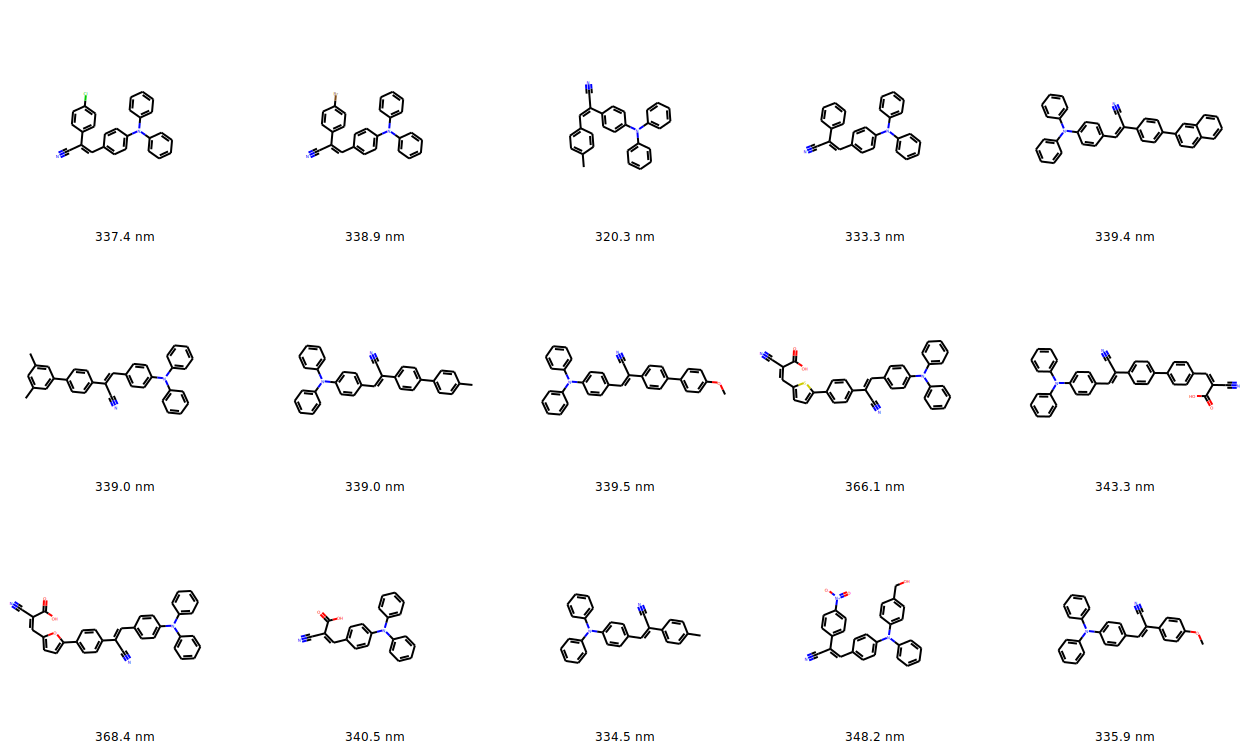

In [44]:
num_cluster= 0
mollist=[minidf.mol.iloc[e] for e in clusters[num_cluster] ]
stalist=[minidf['lambda_sTDA (nm)'].iloc[e] for e in clusters[num_cluster] ]
lengend=[r'{} nm'.format(x) for x in stalist]
svg = Draw.MolsToGridImage(mollist[0:15], molsPerRow=5, subImgSize=(250,250), 
                                                   legends=lengend, useSVG=True  )

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'butina-on-cluster23')
utils.display_svg(svg)

In [46]:
num_cluster=0
for e in clusters[num_cluster]:
    print(minidf.smiles.iloc[e])

N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(Cl)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(Br)cc1
Cc1ccc(C=C(C#N)c2ccc(N(c3ccccc3)c3ccccc3)cc2)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccccc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(-c2ccc3ccccc3c2)cc1
Cc1cc(C)cc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)c1
Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)cc1
COc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)cc1
N#CC(=Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)s1)C(=O)O
N#CC(=Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)cc1)C(=O)O
N#CC(=Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)o1)C(=O)O
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)C(=O)O
Cc1ccc(C(C#N)=Cc2ccc(N(c3ccccc3)c3ccccc3)cc2)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccc(CO)cc2)cc1)c1ccc([N+](=O)[O-])cc1
COc1ccc(C(C#N)=Cc2ccc(N(c3ccccc3)c3ccccc3)cc2)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(-c2ccccc2)cc1


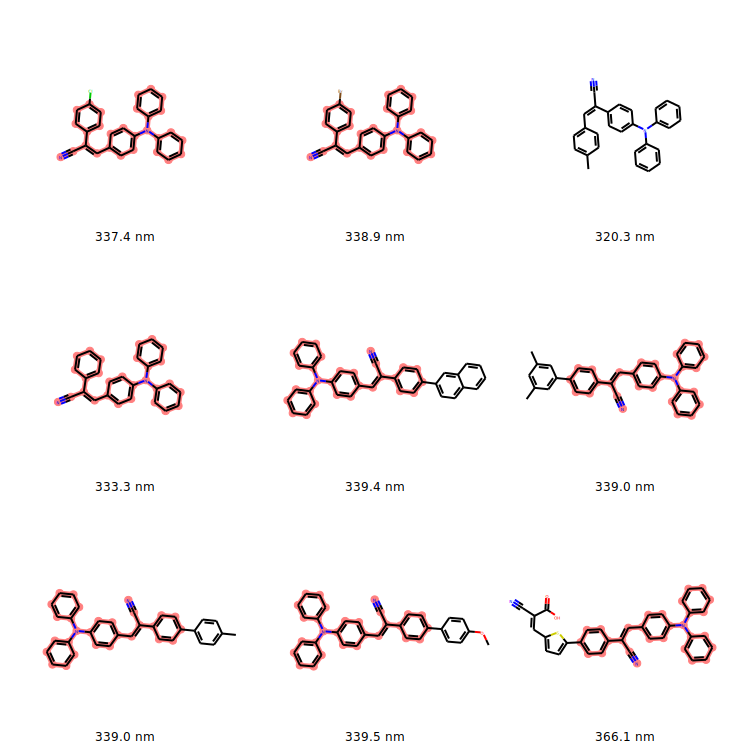

In [57]:
num_cluster= 0
#smart gotten from https://chem-space.com/search
smart='N#C[#6](-c1ccccc1)=[#6]-c1ccc(cc1)-[#7](-c1ccccc1)-c1ccccc1'
mollist=[minidf.mol.iloc[e] for e in clusters[num_cluster] ]
stalist=[minidf['lambda_sTDA (nm)'].iloc[e] for e in clusters[num_cluster] ]
lengend=[r'{} nm'.format(x) for x in stalist]
svg = Draw.MolsToGridImage(mollist[0:9], molsPerRow=3, subImgSize=(250,250),  
                           highlightAtomLists=[mol.GetSubstructMatch(Chem.MolFromSmarts(smart)) for mol in mollist],
                           legends=lengend,useSVG=True)

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'butina-on-cluster23-highligh9')
utils.display_svg(svg)

In [80]:
smi='C(=CC2=CC1=NC(CN1C=C2)C3=CC=C(C=C3)[*])C4=CC=C(C=C4)[*]'

In [81]:
mol=smi2mol(smi)

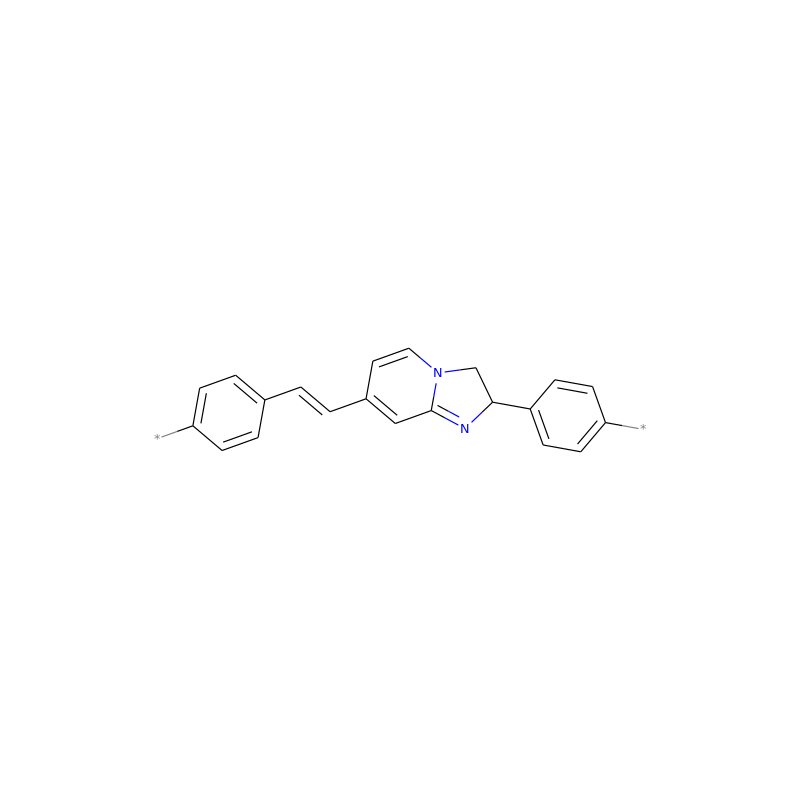

In [83]:
Draw.MolToImage(mol,size=(800, 800))

In [67]:
from rdkit.Chem import MolFromSmiles as smi2mol

a



__________________________________________________________________________
cluser = 22


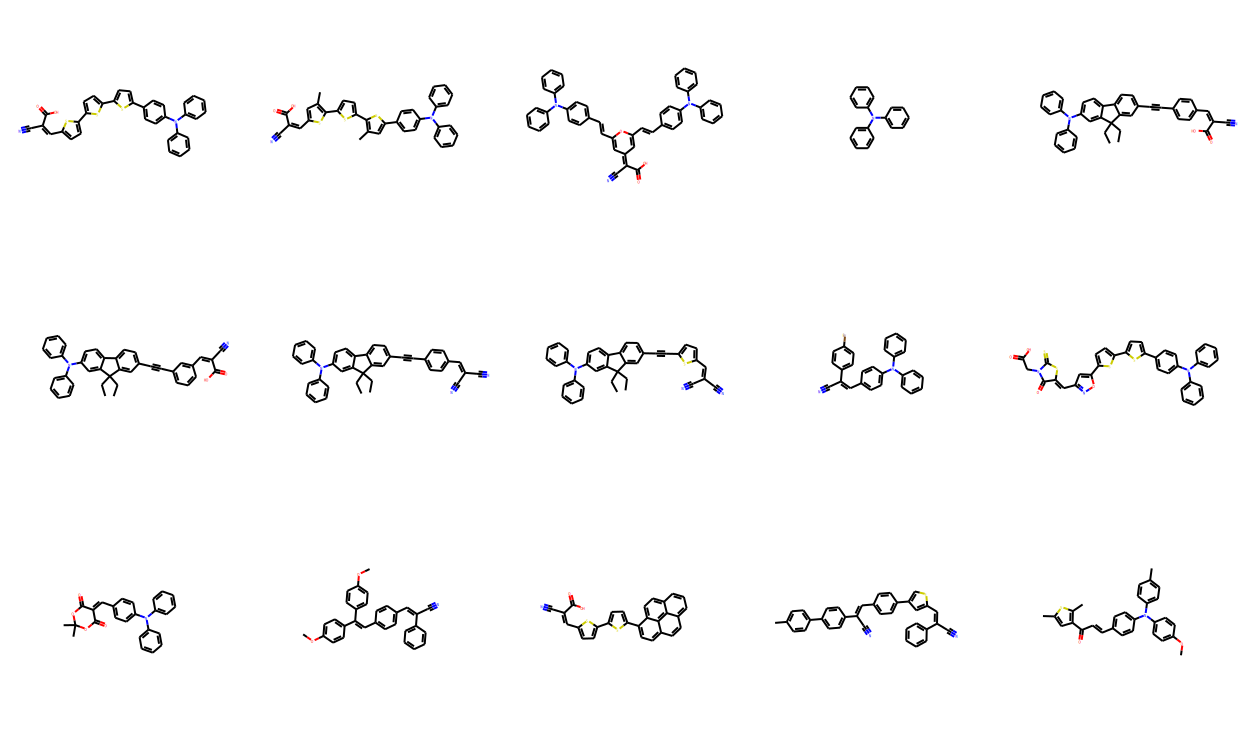

__________________________________________________________________________
__________________________________________________________________________
cluser = 53


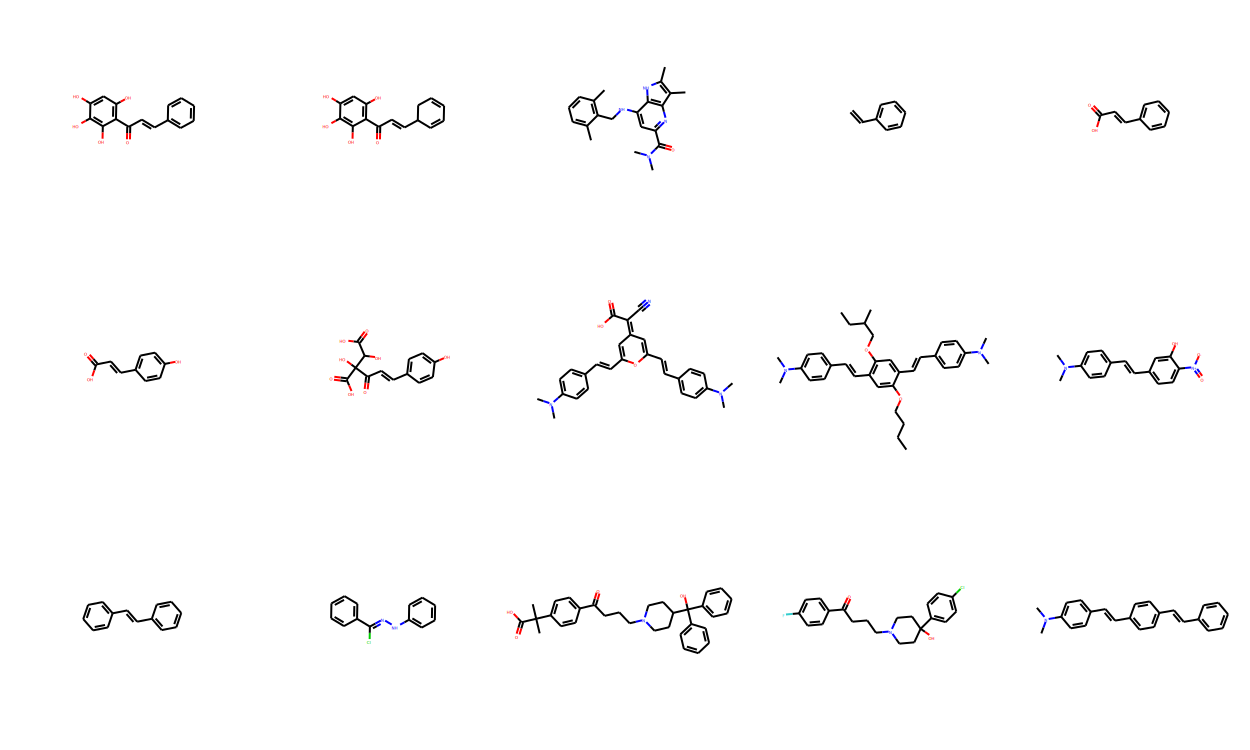

__________________________________________________________________________
__________________________________________________________________________
cluser = 32


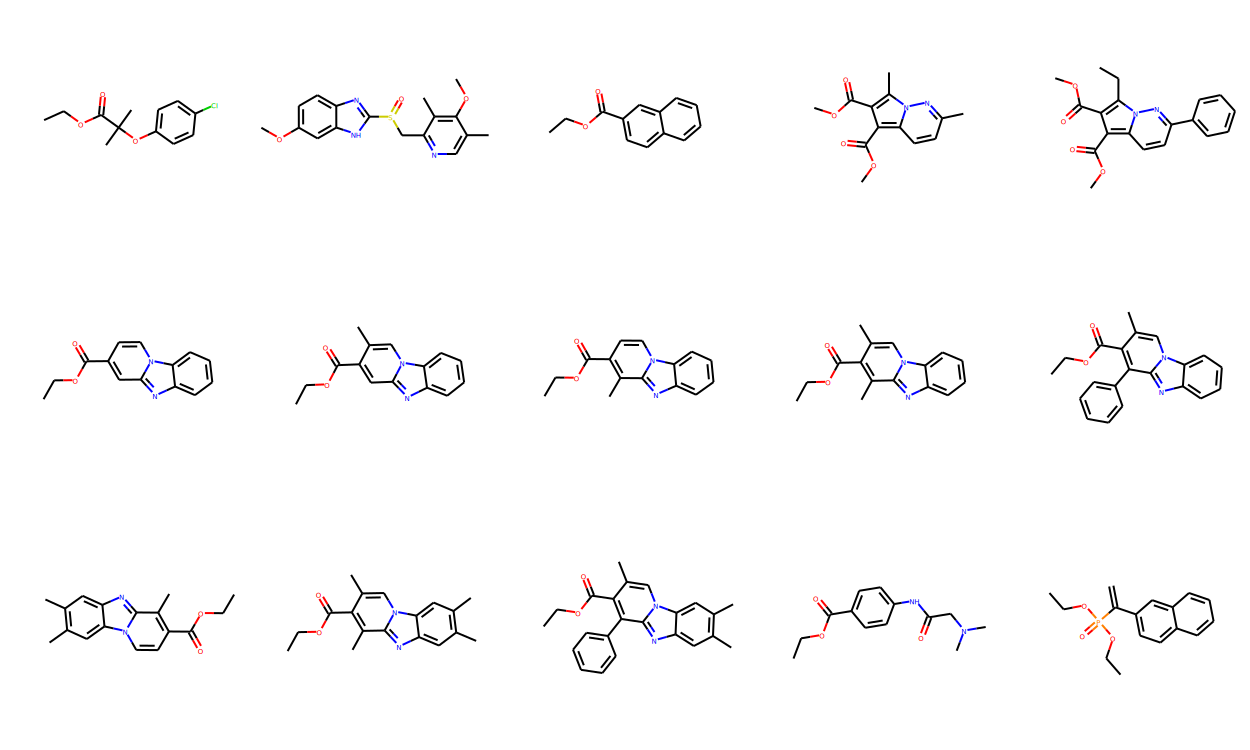

__________________________________________________________________________
__________________________________________________________________________
cluser = 40


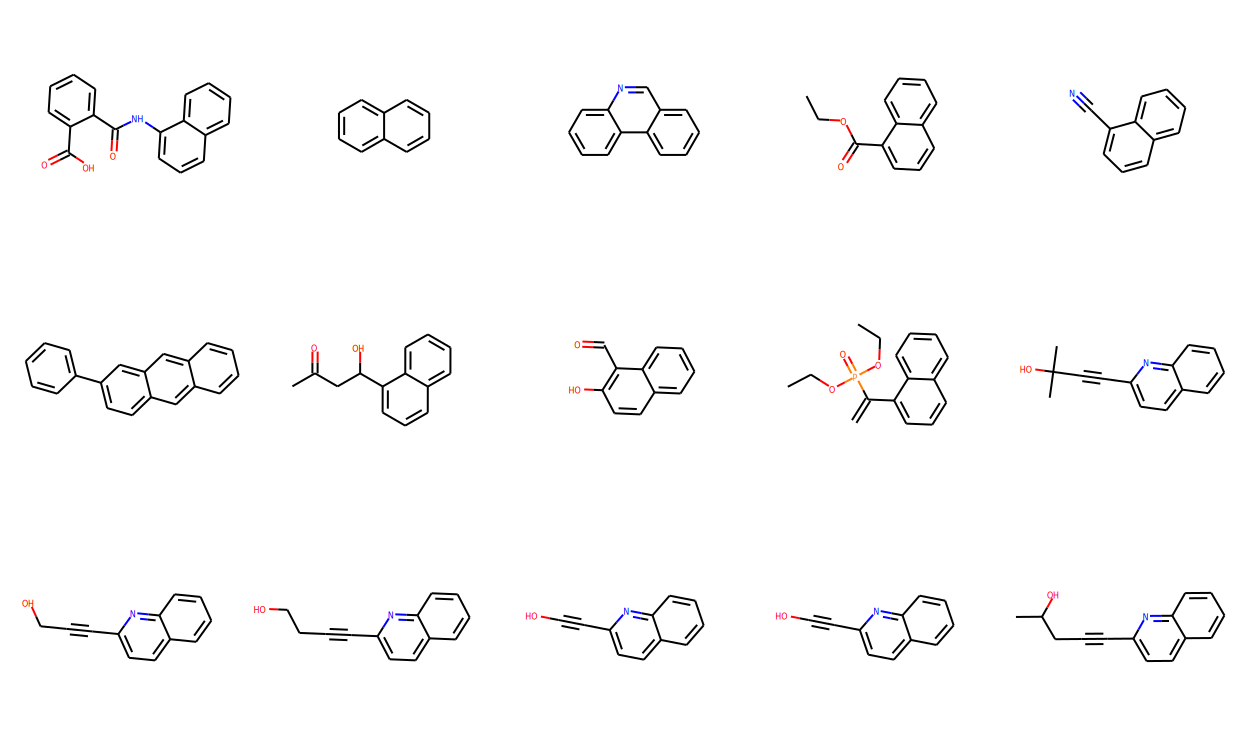

__________________________________________________________________________
__________________________________________________________________________
cluser = 3


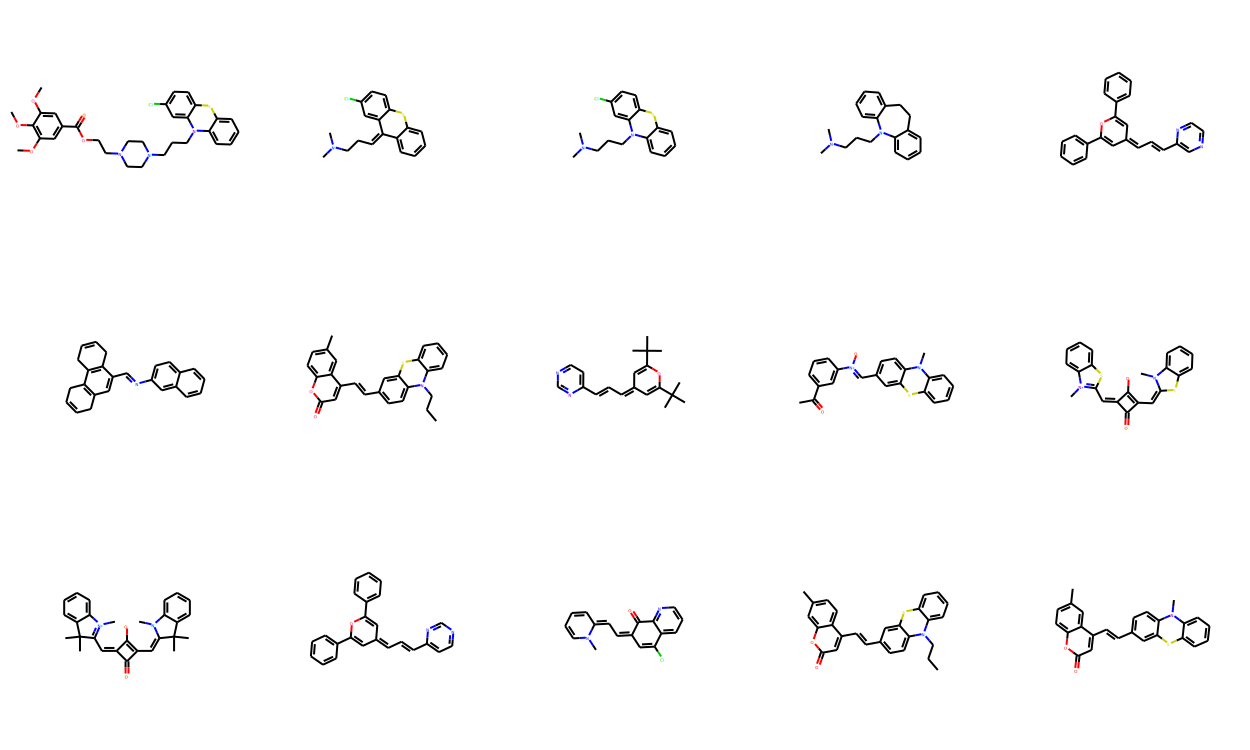

__________________________________________________________________________
__________________________________________________________________________
cluser = 21


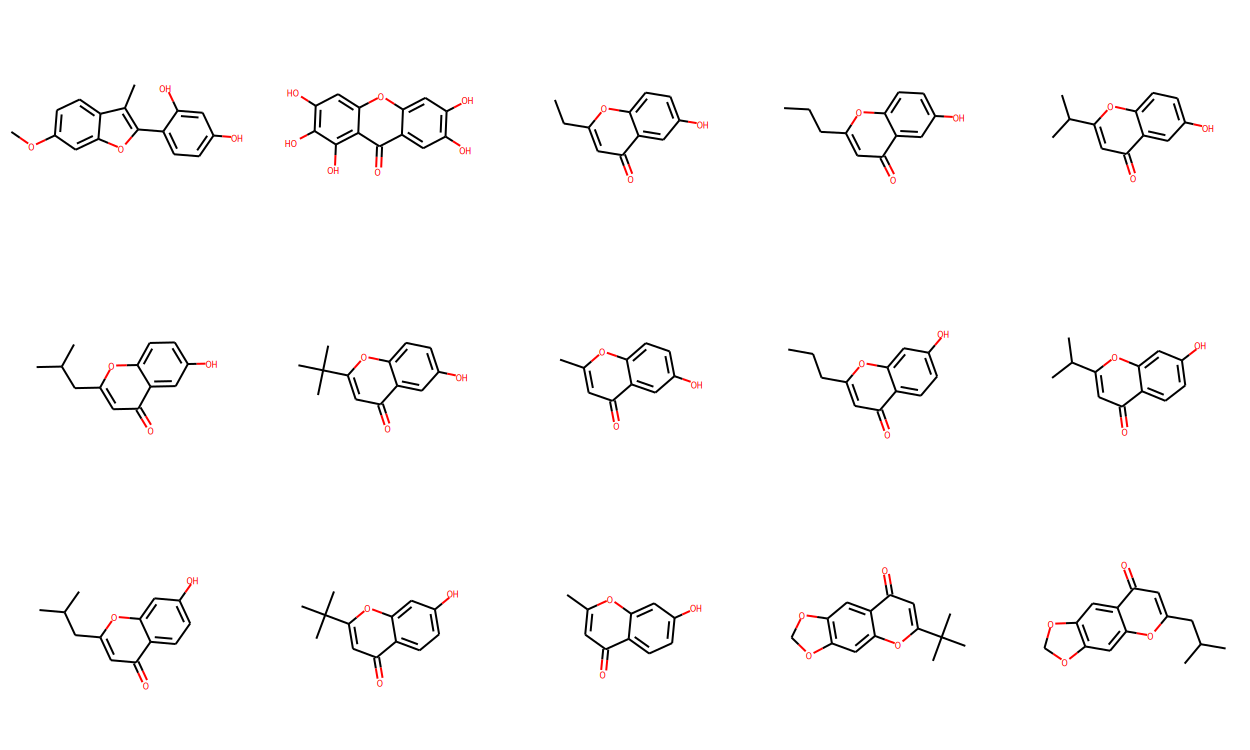

__________________________________________________________________________
__________________________________________________________________________
cluser = 54


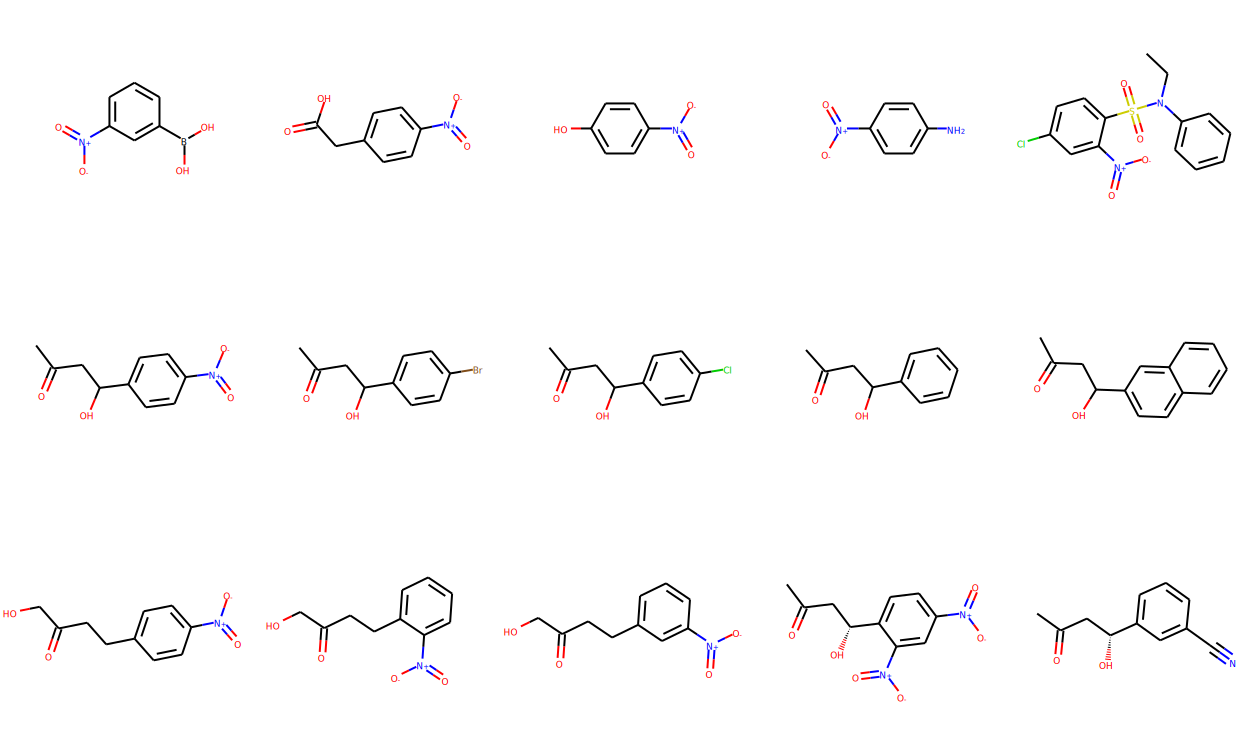

__________________________________________________________________________


In [101]:
for tag in counts[1:8].keys():
    print('__________________________________________________________________________')
    print('cluser = {}'.format(tag))
    
    mollist=df[df['cluster']==tag].mol[0:15].tolist()

    #Draw.MolsToGridImage(mollist,lengends=[r'{}'.format(x) for x in stalist])
    svg = Draw.MolsToGridImage(mollist, molsPerRow=5, subImgSize=(250,250),useSVG=True)

    #svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
    #utils.save_molgrid(svg, results_path,'sample-cluster23')
    utils.display_svg(svg)
    print('__________________________________________________________________________')

In [89]:
counts[1:8]

22    292
53    217
32    184
40    137
3     125
21    123
54    116
Name: cluster, dtype: int64